<a href="https://colab.research.google.com/github/dramolprakash/Predicting-Bone-Fractures-through-Machine-Learning-by-Dr.Amol-Prakash/blob/main/Predicting_Bone_Fractures_through_Machine_Learning_by_Dr_Amol_Prakash_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Mounting google drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## loading the csv file in to dataframe using pandas

In [3]:
path = "/content/drive/MyDrive/Bone Mineral Density/UA.csv"
df= pd.read_csv(path)
df.head()

,Gender,Age,Height,Weight,BMI,L1-4,L1.4T,FN,FNT,TL,...,Hyperuricemia,AS,VT,VD,OP,CAD,CKD,Fracture,Smoking,Drinking
0,2,61.9,164.0,47.0,17.474717,0.894,-2.4,0.6895,-2.95,0.7130,...,1,1,0,1,1,1,0,0,1,0
1,2,55.0,162.0,54.0,20.576132,1.333,1.3,0.9130,-1.30,1.0675,...,1,1,0,1,1,0,1,0,0,0
2,2,44.0,160.0,54.0,21.093750,1.157,-0.2,0.5190,-3.85,0.5770,...,1,1,0,1,1,1,0,0,0,0
3,1,64.7,158.0,59.0,23.634033,0.948,-2.3,0.7920,-2.15,0.9050,...,1,1,0,1,1,1,0,0,1,1
4,1,88.5,167.0,60.0,21.513859,1.114,-0.9,0.8250,-1.90,0.9385,...,1,1,0,1,1,1,0,0,1,0


In [4]:
print(df.info)

<bound method DataFrame.info of       Gender   Age  Height  Weight        BMI   L1-4  L1.4T      FN   FNT  \
0          2  61.9   164.0    47.0  17.474717  0.894   -2.4  0.6895 -2.95   
1          2  55.0   162.0    54.0  20.576132  1.333    1.3  0.9130 -1.30   
2          2  44.0   160.0    54.0  21.093750  1.157   -0.2  0.5190 -3.85   
3          1  64.7   158.0    59.0  23.634033  0.948   -2.3  0.7920 -2.15   
4          1  88.5   167.0    60.0  21.513859  1.114   -0.9  0.8250 -1.90   
...      ...   ...     ...     ...        ...    ...    ...     ...   ...   
1532       2  51.0   160.0    59.0  23.046875  0.941   -2.0  0.7755 -2.30   
1533       1  51.0   167.0    65.0  23.306680  1.048   -1.4  0.9755 -0.05   
1534       1  46.6   168.0    69.0  24.447279  1.411    1.6  0.9450 -0.95   
1535       1  55.0   175.0    70.0  22.857143  1.075   -1.2  1.0815  0.85   
1536       1  45.0   172.0    87.0  29.407788  1.409    1.6  0.8850 -1.45   

          TL  ...  Hyperuricemia  AS  VT  V

In [5]:
print(df.dtypes)

Gender               int64
Age                float64
Height             float64
Weight             float64
BMI                float64
L1-4               float64
L1.4T              float64
FN                 float64
FNT                float64
TL                 float64
TLT                float64
ALT                float64
AST                float64
BUN                float64
CREA               float64
URIC               float64
FBG                float64
HDL-C              float64
LDL-C              float64
Ca                 float64
P                  float64
Mg                 float64
Calsium              int64
Calcitriol           int64
Bisphosphonate       int64
Calcitonin           int64
HTN                  int64
COPD                 int64
DM                   int64
Hyperlipidaemia      int64
Hyperuricemia        int64
AS                   int64
VT                   int64
VD                   int64
OP                   int64
CAD                  int64
CKD                  int64
F

## Dropping the Unnecessary columns

In [6]:
columns_to_drop = ['Height','Weight','L1-4','L1.4T', 'FN','ALT','AST','BUN','CREA','URIC','FBG',
                   'HDL-C','LDL-C','Ca','P','Mg', 'TL', 'Calsium', 'Calcitriol', 'Bisphosphonate',
                   'Calcitonin','Hyperlipidaemia','Hyperuricemia','AS',]
df.drop(columns=columns_to_drop, inplace=True)
print(df)

      Gender   Age        BMI   FNT   TLT  HTN  COPD  DM  VT  VD  OP  CAD  \
0          2  61.9  17.474717 -2.95 -2.90    1     1   0   0   1   1    1   
1          2  55.0  20.576132 -1.30 -0.15    1     0   1   0   1   1    0   
2          2  44.0  21.093750 -3.85 -3.55    1     1   1   0   1   1    1   
3          1  64.7  23.634033 -2.15 -1.40    1     1   1   0   1   1    1   
4          1  88.5  21.513859 -1.90 -1.15    1     0   1   0   1   1    1   
...      ...   ...        ...   ...   ...  ...   ...  ..  ..  ..  ..  ...   
1532       2  51.0  23.046875 -2.30 -1.35    0     0   0   0   0   0    0   
1533       1  51.0  23.306680 -0.05  1.35    1     0   0   0   0   0    1   
1534       1  46.6  24.447279 -0.95 -0.10    0     0   0   0   0   0    0   
1535       1  55.0  22.857143  0.85  1.40    0     0   0   0   0   0    0   
1536       1  45.0  29.407788 -1.45 -1.30    1     0   0   0   0   0    0   

      CKD  Fracture  Smoking  Drinking  
0       0         0        1      

### Check the null values in Python:

In [7]:
null_counts = df.isnull().sum()
print(null_counts)

Gender       0
Age         36
BMI         34
FNT          0
TLT          0
HTN          0
COPD         0
DM           0
VT           0
VD           0
OP           0
CAD          0
CKD          0
Fracture     0
Smoking      0
Drinking     0
dtype: int64


We replaced the null values using the mean function in Python.



In [8]:
mean_value = df[['Gender','Age','BMI','FNT','TLT','HTN','COPD','DM','VT','VD','OP','CAD',
                 'CKD','Fracture','Smoking','Drinking']].mean()

df.fillna(mean_value, inplace=True)

### Check the data types and correct them


In [9]:
print(df.dtypes)

Gender        int64
Age         float64
BMI         float64
FNT         float64
TLT         float64
HTN           int64
COPD          int64
DM            int64
VT            int64
VD            int64
OP            int64
CAD           int64
CKD           int64
Fracture      int64
Smoking       int64
Drinking      int64
dtype: object


We then changed the data types of the columns Gender, HTN, COPD, DM, VT, VD, OP, CAD, CKD, Fracture,
Smoking, and Drinking to integer in Python using the “.astype()” function.

In [10]:
df['Gender'] = df['Gender'].astype(int)

In [11]:

df[['HTN','COPD','DM','VT','VD','OP','CAD','CKD','Fracture',
    'Smoking','Drinking']] = df[['HTN','COPD','DM','VT','VD','OP','CAD','CKD',
                                 'Fracture','Smoking','Drinking']].astype(int)

print(df)


      Gender   Age        BMI   FNT   TLT  HTN  COPD  DM  VT  VD  OP  CAD  \
0          2  61.9  17.474717 -2.95 -2.90    1     1   0   0   1   1    1   
1          2  55.0  20.576132 -1.30 -0.15    1     0   1   0   1   1    0   
2          2  44.0  21.093750 -3.85 -3.55    1     1   1   0   1   1    1   
3          1  64.7  23.634033 -2.15 -1.40    1     1   1   0   1   1    1   
4          1  88.5  21.513859 -1.90 -1.15    1     0   1   0   1   1    1   
...      ...   ...        ...   ...   ...  ...   ...  ..  ..  ..  ..  ...   
1532       2  51.0  23.046875 -2.30 -1.35    0     0   0   0   0   0    0   
1533       1  51.0  23.306680 -0.05  1.35    1     0   0   0   0   0    1   
1534       1  46.6  24.447279 -0.95 -0.10    0     0   0   0   0   0    0   
1535       1  55.0  22.857143  0.85  1.40    0     0   0   0   0   0    0   
1536       1  45.0  29.407788 -1.45 -1.30    1     0   0   0   0   0    0   

      CKD  Fracture  Smoking  Drinking  
0       0         0        1      

code to update the data types using .astype() function

In [12]:
print(df.dtypes)

Gender        int64
Age         float64
BMI         float64
FNT         float64
TLT         float64
HTN           int64
COPD          int64
DM            int64
VT            int64
VD            int64
OP            int64
CAD           int64
CKD           int64
Fracture      int64
Smoking       int64
Drinking      int64
dtype: object


After correcting the data types, we rechecked for null values to ensure the data is completely clean to proceed with
further steps in data cleaning.

In [13]:
null_counts = df.isnull().sum()
print(null_counts)

Gender      0
Age         0
BMI         0
FNT         0
TLT         0
HTN         0
COPD        0
DM          0
VT          0
VD          0
OP          0
CAD         0
CKD         0
Fracture    0
Smoking     0
Drinking    0
dtype: int64


In [14]:
print(df.info)

<bound method DataFrame.info of       Gender   Age        BMI   FNT   TLT  HTN  COPD  DM  VT  VD  OP  CAD  \
0          2  61.9  17.474717 -2.95 -2.90    1     1   0   0   1   1    1   
1          2  55.0  20.576132 -1.30 -0.15    1     0   1   0   1   1    0   
2          2  44.0  21.093750 -3.85 -3.55    1     1   1   0   1   1    1   
3          1  64.7  23.634033 -2.15 -1.40    1     1   1   0   1   1    1   
4          1  88.5  21.513859 -1.90 -1.15    1     0   1   0   1   1    1   
...      ...   ...        ...   ...   ...  ...   ...  ..  ..  ..  ..  ...   
1532       2  51.0  23.046875 -2.30 -1.35    0     0   0   0   0   0    0   
1533       1  51.0  23.306680 -0.05  1.35    1     0   0   0   0   0    1   
1534       1  46.6  24.447279 -0.95 -0.10    0     0   0   0   0   0    0   
1535       1  55.0  22.857143  0.85  1.40    0     0   0   0   0   0    0   
1536       1  45.0  29.407788 -1.45 -1.30    1     0   0   0   0   0    0   

      CKD  Fracture  Smoking  Drinking  
0 

## Check for Outliers:
employed the Box plot method to detect any outliers for continuous data in columns Age, BMI, FNT, and TLT.

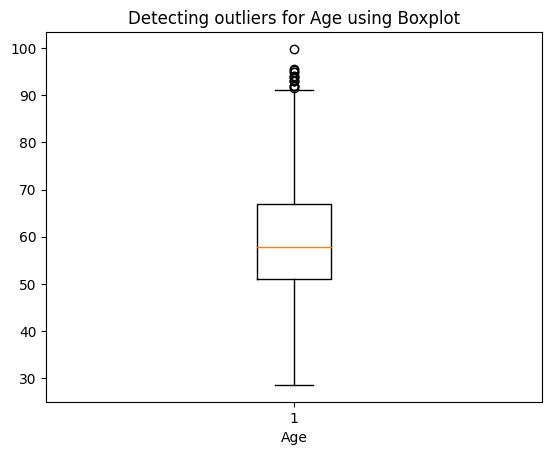

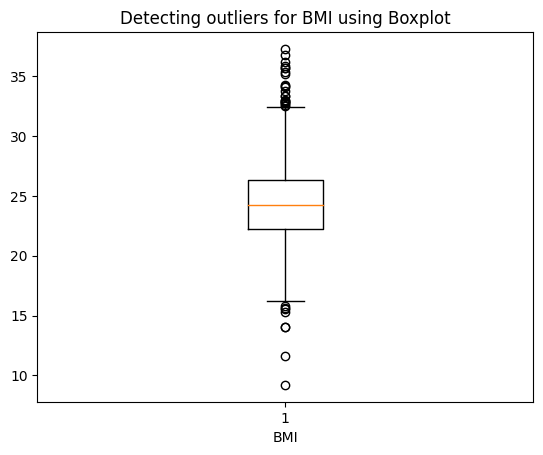

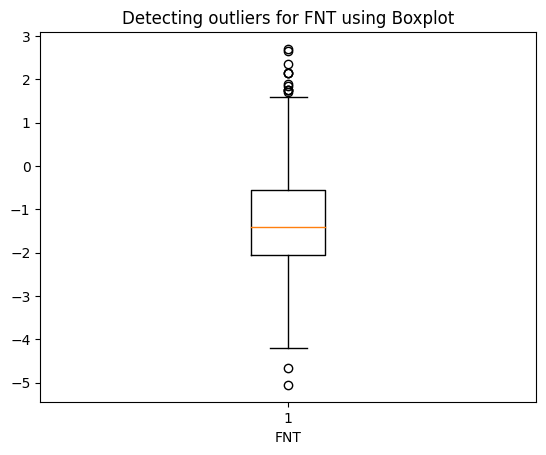

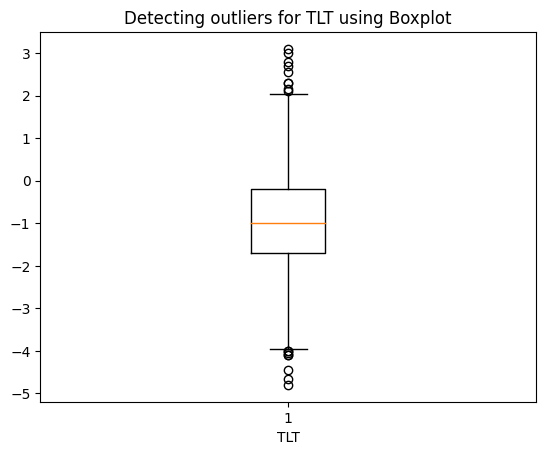

In [15]:
import matplotlib.pyplot as plt

# create a list of column names to plot
columns_to_plot = ['Age','BMI','FNT' ,'TLT']

# create a boxplot for each column
for column in columns_to_plot:
    plt.boxplot(df[column], vert=True)
    plt.title('Detecting outliers for ' + column + ' using Boxplot')
    plt.xlabel(column)
    plt.show()


## Outliers treatment (IQR)
For each column, we calculated the interquartile range (IQR), which is the distance between the first and third quartiles
of the distribution for that column. Then, we established 1.5 times the IQR below Q1 and above Q3, respectively, as
the lower and upper boundaries for outlier detection.

Treating outliers by using the Interquartile range (IQR) method, by using outliers.sum() and it showed 70 outliers later

In [16]:
# create a subset of columns to plot
columns_to_plot = df[['Age','BMI','FNT' ,'TLT']]

# calculate the IQR for each column
Q1 = columns_to_plot.quantile(0.25)
Q3 = columns_to_plot.quantile(0.75)
IQR = Q3 - Q1

# define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# find outliers for each column
outliers = ((columns_to_plot < lower_bound) | (columns_to_plot > upper_bound)).any(axis=1)

# print the number of outliers for each column
print(outliers.sum())


70


In [17]:
import numpy as np

# calculate the mean for each column
mean = columns_to_plot.mean()

# replace outliers with mean
for column in columns_to_plot.columns:
    outliers = ((columns_to_plot[column] < lower_bound[column]) | (columns_to_plot[column] > upper_bound[column]))
    columns_to_plot_copy = columns_to_plot.copy()  # Make a copy of the slice
    columns_to_plot_copy.loc[outliers, column] = mean[column]
    columns_to_plot.loc[outliers, column] = columns_to_plot_copy[column]  # Assign back to original DataFrame

# verify that there are no more outliers
outliers = ((columns_to_plot < lower_bound) | (columns_to_plot > upper_bound)).any(axis=1)
print(outliers.sum())

0


<ipython-input-17-4fa1fd662e25>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns_to_plot.loc[outliers, column] = columns_to_plot_copy[column]  # Assign back to original DataFrame


## Data Analysis:
### Descriptive Analysis:

In [18]:
median = df.median()
print(median)

Gender       1.000000
Age         57.800000
BMI         24.242424
FNT         -1.400000
TLT         -1.000000
HTN          1.000000
COPD         0.000000
DM           0.000000
VT           0.000000
VD           0.000000
OP           0.000000
CAD          0.000000
CKD          0.000000
Fracture     0.000000
Smoking      0.000000
Drinking     0.000000
dtype: float64


Range

In [19]:
range_stat = df.max() - df.min()
print(range_stat)

Gender       1.000000
Age         71.200000
BMI         28.048203
FNT          7.750000
TLT          7.900000
HTN          1.000000
COPD         1.000000
DM           1.000000
VT           1.000000
VD           1.000000
OP           1.000000
CAD          1.000000
CKD          1.000000
Fracture     1.000000
Smoking      1.000000
Drinking     1.000000
dtype: float64


Variance

In [20]:
variance = df.var()
print(variance)

Gender        0.236967
Age         163.533376
BMI          10.755552
FNT           1.235681
TLT           1.327416
HTN           0.247874
COPD          0.185901
DM            0.220975
VT            0.018524
VD            0.067603
OP            0.233135
CAD           0.161892
CKD           0.036937
Fracture      0.019775
Smoking       0.191388
Drinking      0.175976
dtype: float64


## Test for Normality and Skewness of Data:

In [21]:
pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 784.3 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=2286394b3d94870225323f700351ead0003b4c061ac605f95f120fcfe1f6f7a6
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor-analyzer


In [22]:
from scipy import stats, linalg
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

### Shapiro-Wilk test to determine the normal distribution of our data

In [23]:
from scipy.stats import shapiro
import pandas as pd
cols_of_interest = ['Age', 'BMI', 'FNT', 'TLT']
for col in cols_of_interest:
    col_data = df[col]
    stat, p = shapiro(col_data)
    print(f"Column '{col}': Statistic= {stat:.4f}, p = {p:.20f}")
    alpha = 0.05
    if p > alpha:
        print("Sample looks Gaussian (fail to reject H0)\n")
    else:
        print("Sample does not look Gaussian (reject H0)\n")


Column 'Age': Statistic= 0.9760, p = 0.00000000000000237832
Sample does not look Gaussian (reject H0)

Column 'BMI': Statistic= 0.9914, p = 0.00000007392632994652
Sample does not look Gaussian (reject H0)

Column 'FNT': Statistic= 0.9943, p = 0.00001265854916709941
Sample does not look Gaussian (reject H0)

Column 'TLT': Statistic= 0.9967, p = 0.00216644722968339920
Sample does not look Gaussian (reject H0)



## density plot to illustrate the distribution of data

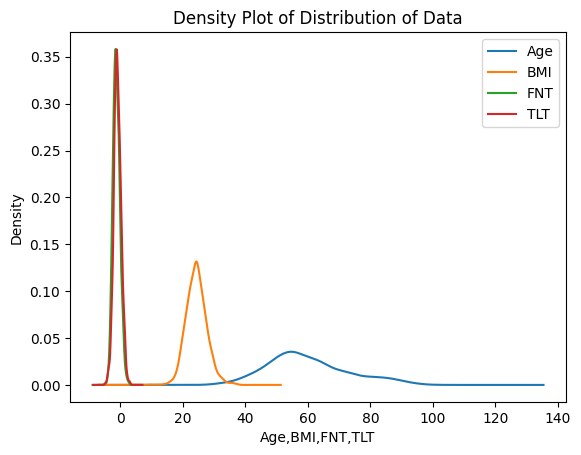

In [24]:
cols_of_interest = ['Age', 'BMI', 'FNT', 'TLT']
df_cols = df[cols_of_interest]
df_cols.plot(kind='density')
plt.xlabel('Age,BMI,FNT,TLT')
plt.ylabel('Density')
plt.title('Density Plot of Distribution of Data')
plt.show()

### calculating the skewness of the data

In [25]:
from scipy.stats import skew
for col in cols_of_interest:
    col_skewness = skew(df[col])
    print(f"Skewness of {col}: {col_skewness:.2f}")

Skewness of Age: 0.51
Skewness of BMI: 0.24
Skewness of FNT: 0.29
Skewness of TLT: 0.14


## Data Visualization:

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Pie chart representation of Gender with Fracture:

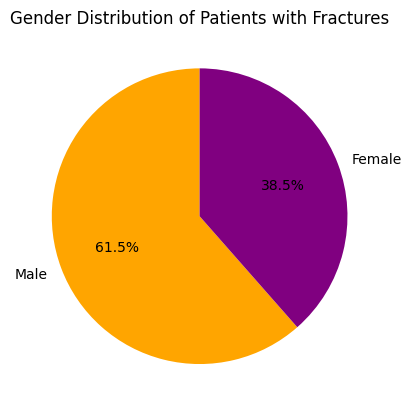

In [27]:
# create a new DataFrame with only male and female patients with fractures
df_pie = df[df['Fracture'] == 1]
df_pie = df[df['Gender'].isin([1, 2])]

# count the number of males and females
counts = df_pie['Gender'].value_counts()

# create a pie chart with the counts
labels = ['Male', 'Female']
colors = ['orange', 'purple']
plt.pie(counts, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)

# add a title to the chart
plt.title('Gender Distribution of Patients with Fractures')

# display the chart
plt.show()

## Bar chart to illustrate the distribution of fracture with different comorbid conditions.

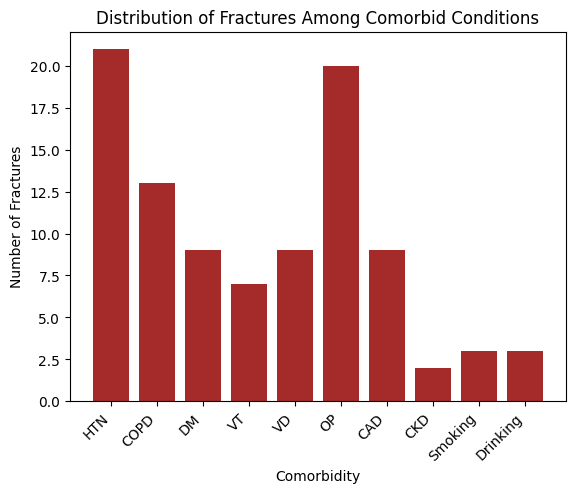

In [28]:
# subset data to only include rows with a fracture
fractures_Data = df[df['Fracture'] == 1]

# count the number of fractures in each medical condition column
fracture_counts = fractures_Data[['HTN','COPD','DM','VT','VD','OP','CAD','CKD','Smoking','Drinking']].sum()

# create the bar chart
plt.bar(fracture_counts.index, fracture_counts.values, color='brown')

# rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

# add axis labels and title
plt.xlabel('Comorbidity')
plt.ylabel('Number of Fractures')
plt.title('Distribution of Fractures Among Comorbid Conditions')

# show the chart
plt.show()


## Histogram representation of the continuous data:

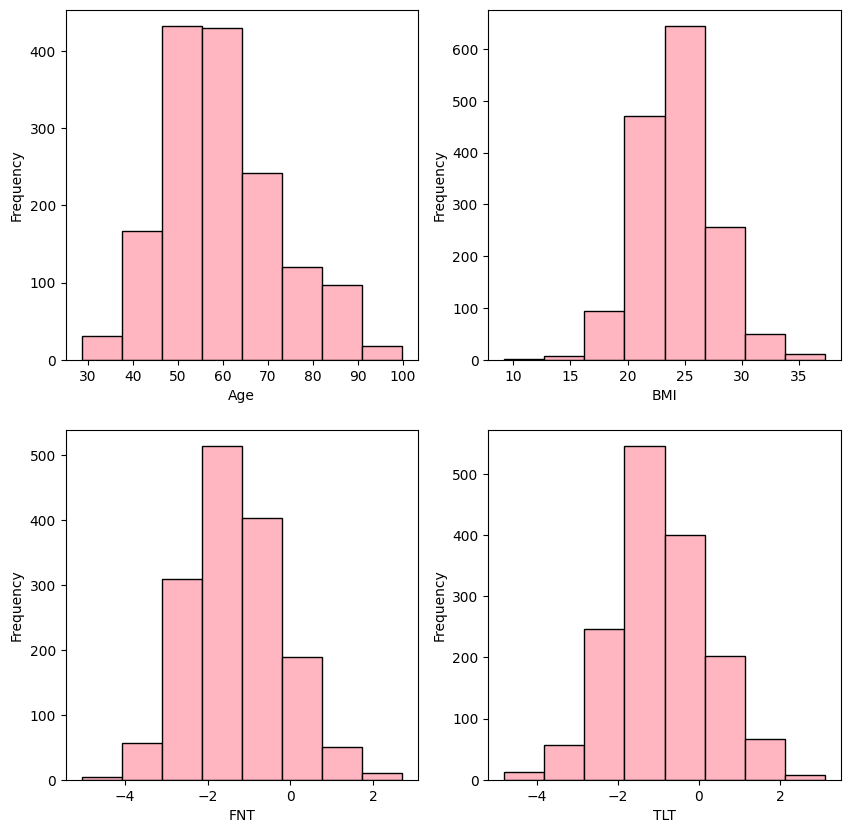

In [29]:
df_hist = df[['Age','BMI','FNT','TLT']]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for ax, col in zip(axes.flatten(), df_hist.columns):
    ax.hist(df_hist[col], bins=8, color='lightpink', edgecolor='black', lw=1)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.show()

## Overall Histogram distribution of the data frame:

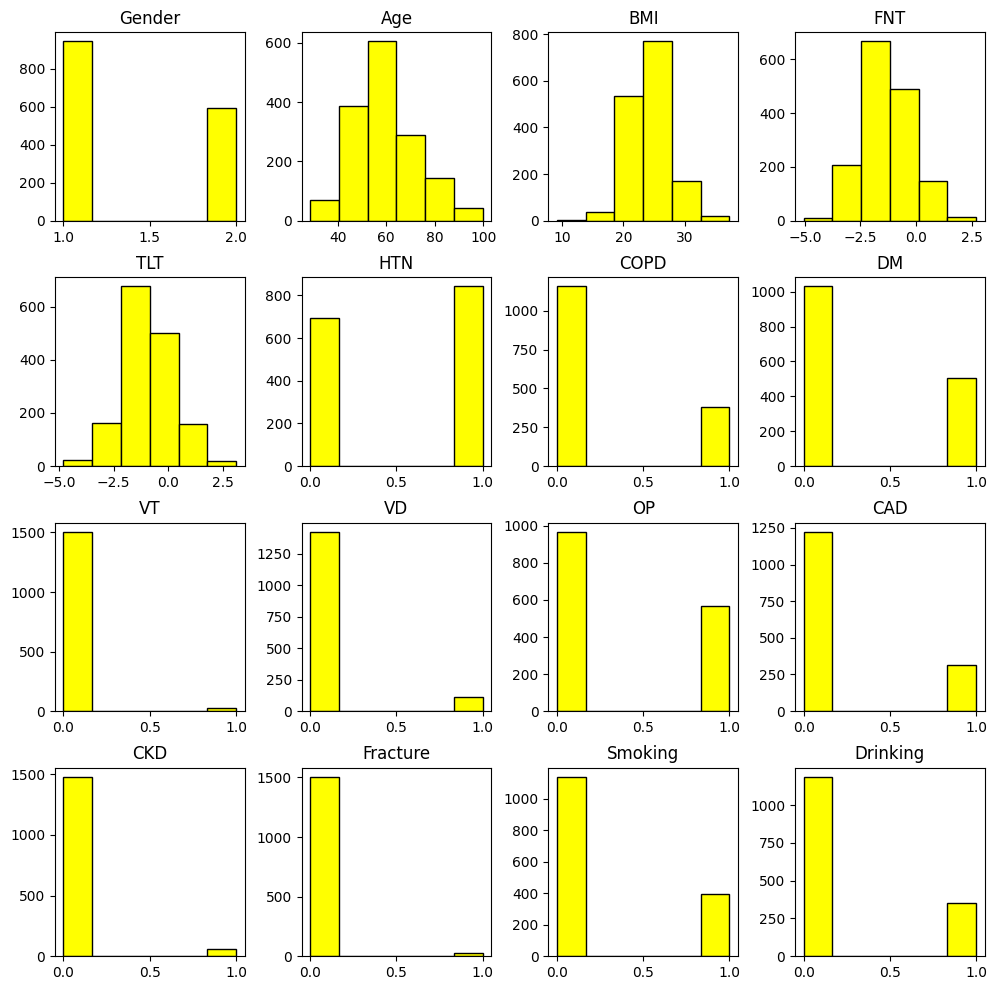

In [30]:
df_hist = df[['Gender', 'Age', 'BMI', 'FNT', 'TLT', 'HTN', 'COPD', 'DM', 'VT', 'VD', 'OP', 'CAD', 'CKD',
              'Fracture', 'Smoking', 'Drinking']]
df_hist.hist(figsize= [12,12], bins=6, grid=False, color='yellow', edgecolor='black', lw=1)
plt.show()

## Spearman’s Correlation Heat Map:

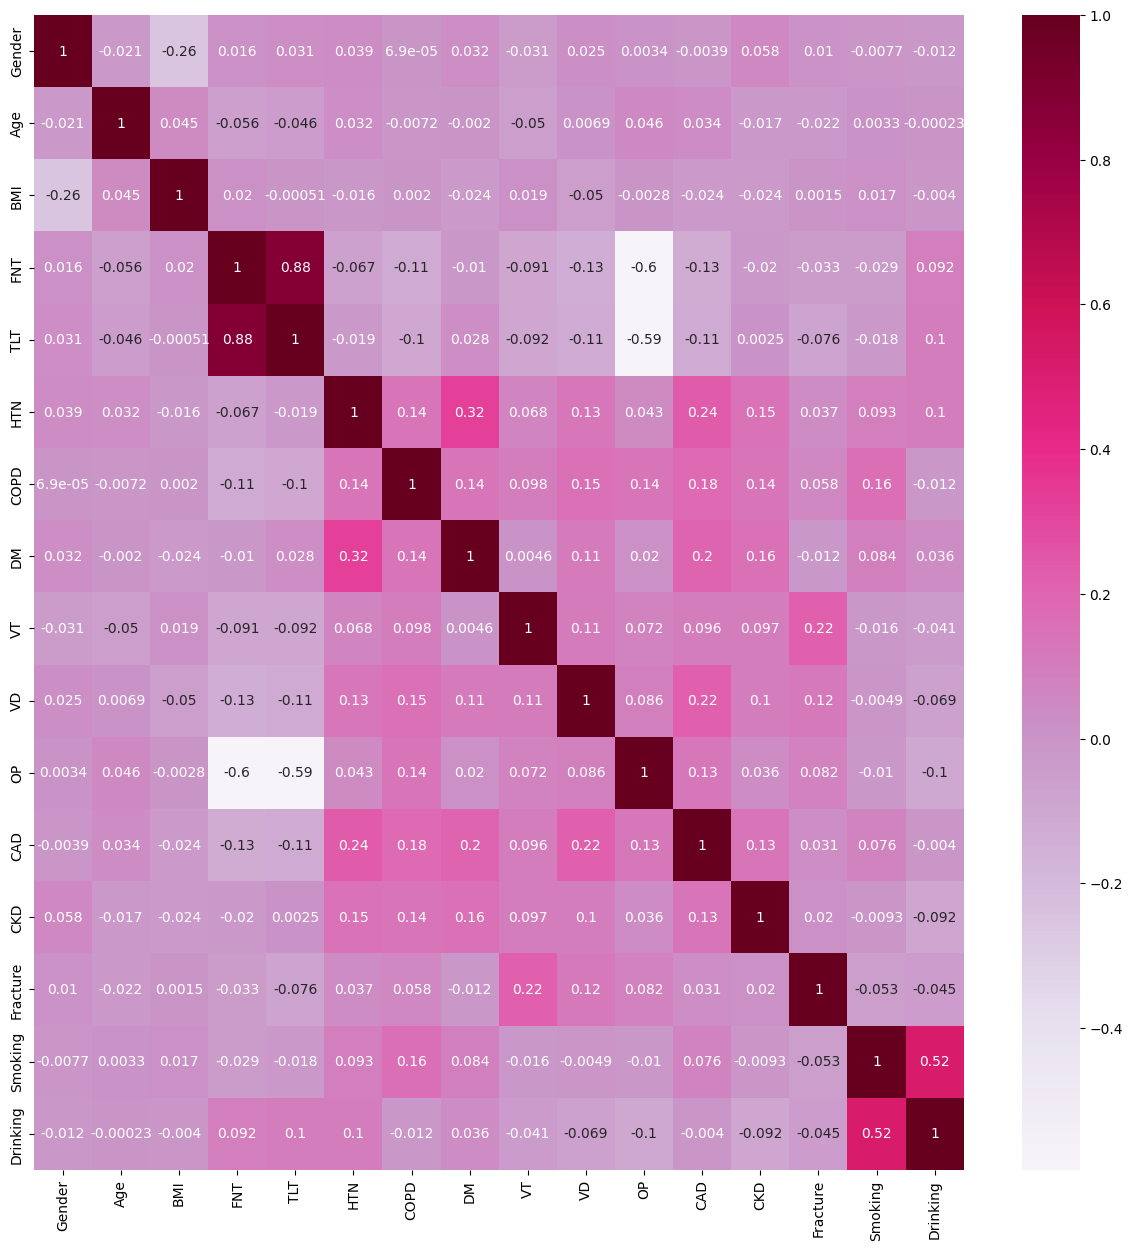

In [31]:
corr_matrix = df.corr('spearman')
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='PuRd', ax=ax)
plt.show()

In [32]:
df_chi = df[['Gender','HTN', 'COPD', 'DM', 'VT', 'VD', 'OP', 'CAD', 'CKD','Fracture','Smoking','Drinking']]
df_chi.head(2)

,Gender,HTN,COPD,DM,VT,VD,OP,CAD,CKD,Fracture,Smoking,Drinking
0,2,1,1,0,0,1,1,1,0,0,1,0
1,2,1,0,1,0,1,1,0,1,0,0,0


In [33]:
pip install tabulate

## Chi-square test:
chi-square test between gender and fracture and got a p-value of >0.05, thus, we fail to reject the null
hypothesis (HO) and conclude that there is no significant association between gender and fracture.

In [34]:
from tabulate import tabulate
from scipy.stats import chi2_contingency

# create the contingency table using pd.crosstab
chi_Gender = pd.crosstab(df_chi.Gender, df_chi.Fracture, margins=True)

# extract the values from the contingency table
values = chi_Gender.iloc[0:2, 0:5].values

# conduct chi-square test
chi2, p, dof, expected = chi2_contingency(values)

# print the contingency table
print("Contingency table:")
table = chi_Gender.reset_index().values.tolist()
headers = ['Gender', 'No Fracture', 'Fracture', 'Total']
print(tabulate(table, headers=headers, tablefmt='grid'))

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("")

# statistical significance
alpha = 0.05
if p < alpha:
    print("There is a significant association between gender and fracture occurrence (reject H0)")
else:
    print("There is no significant association between gender and fracture occurrence (fail to reject H0)")


Contingency table:
+----------+---------------+------------+---------+
| Gender   |   No Fracture |   Fracture |   Total |
+==========+===============+============+=========+
| 1        |           927 |         18 |     945 |
+----------+---------------+------------+---------+
| 2        |           579 |         13 |     592 |
+----------+---------------+------------+---------+
| All      |          1506 |         31 |    1537 |
+----------+---------------+------------+---------+
Chi-square statistic: 0.15616217717249076
p-value: 0.9248894255267679
Degrees of freedom: 2

There is no significant association between gender and fracture occurrence (fail to reject H0)


## chi-square test between HTN and fracture
and got a p-value of >0.05, thus, we fail to reject the null
hypothesis (HO) and conclude that there is no significant association between HTN and fracture.

In [35]:
chi_HTN = pd.crosstab(df_chi.HTN, df_chi.Fracture, margins=True)

values = chi_HTN.iloc[0:2, 0:5].values

chi2, p, dof, expected = chi2_contingency(values)

print("Contingency table:")
table = chi_HTN.reset_index().values.tolist()
headers = ['HTN', 'No Fracture', 'Fracture', 'Total']
print(tabulate(table, headers=headers, tablefmt='grid'))
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("")

alpha = 0.05
if p < alpha:
    print("There is a significant association between HTN and fracture occurrence (reject H0)")
else:
    print("There is no significant association between HTN and fracture occurrence (fail to reject H0)")


Contingency table:
+-------+---------------+------------+---------+
| HTN   |   No Fracture |   Fracture |   Total |
+=======+===============+============+=========+
| 0     |           685 |         10 |     695 |
+-------+---------------+------------+---------+
| 1     |           821 |         21 |     842 |
+-------+---------------+------------+---------+
| All   |          1506 |         31 |    1537 |
+-------+---------------+------------+---------+
Chi-square statistic: 2.145182421771671
p-value: 0.34212086056416074
Degrees of freedom: 2

There is no significant association between HTN and fracture occurrence (fail to reject H0)


## Chi-square test between COPD and fracture.
and got a p-value of >0.05, thus, we fail to reject the null
hypothesis (HO) and conclude that there is no significant association between COPD and fracture.

In [36]:
chi_COPD = pd.crosstab(df_chi.COPD, df_chi.Fracture, margins=True)

values = chi_COPD.iloc[0:2, 0:5].values

chi2, p, dof, expected = chi2_contingency(values)

print("Contingency table:")
table = chi_COPD.reset_index().values.tolist()
headers = ['COPD', 'No Fracture', 'Fracture', 'Total']
print(tabulate(table, headers=headers, tablefmt='grid'))
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("")

alpha = 0.05
if p < alpha:
    print("There is a significant association between COPD and fracture occurrence (reject H0)")
else:
    print("There is no significant association between COPD and fracture occurrence (fail to reject H0)")


Contingency table:
+--------+---------------+------------+---------+
| COPD   |   No Fracture |   Fracture |   Total |
+========+===============+============+=========+
| 0      |          1140 |         18 |    1158 |
+--------+---------------+------------+---------+
| 1      |           366 |         13 |     379 |
+--------+---------------+------------+---------+
| All    |          1506 |         31 |    1537 |
+--------+---------------+------------+---------+
Chi-square statistic: 5.083351674646666
p-value: 0.07873434321792153
Degrees of freedom: 2

There is no significant association between COPD and fracture occurrence (fail to reject H0)


## Chi-square test between DM and fracture.
got a p-value of >0.05, thus, we fail to reject the null
hypothesis (HO) and conclude that there is no significant association between DM and fracture.

In [37]:
chi_DM = pd.crosstab(df_chi.DM, df_chi.Fracture, margins=True)

values = chi_DM.iloc[0:2, 0:5].values

chi2, p, dof, expected = chi2_contingency(values)

print("Contingency table:")
table = chi_DM.reset_index().values.tolist()
headers = ['DM', 'No Fracture', 'Fracture', 'Total']
print(tabulate(table, headers=headers, tablefmt='grid'))
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("")

alpha = 0.05
if p < alpha:
    print("There is a significant association between DM and fracture occurrence (reject H0)")
else:
    print("There is no significant association between DM and fracture occurrence (fail to reject H0)")


Contingency table:
+------+---------------+------------+---------+
| DM   |   No Fracture |   Fracture |   Total |
+======+===============+============+=========+
| 0    |          1009 |         22 |    1031 |
+------+---------------+------------+---------+
| 1    |           497 |          9 |     506 |
+------+---------------+------------+---------+
| All  |          1506 |         31 |    1537 |
+------+---------------+------------+---------+
Chi-square statistic: 0.21668500496545223
p-value: 0.8973202093935105
Degrees of freedom: 2

There is no significant association between DM and fracture occurrence (fail to reject H0)


## Chi-square test between VT and fracture.
got a p-value of <0.05, thus, we reject the null hypothesis
(HO) and conclude that there is a significant association between VT and fracture.

In [38]:
chi_VT = pd.crosstab(df_chi.VT, df_chi.Fracture, margins=True)

values = chi_VT.iloc[0:2, 0:5].values

chi2, p, dof, expected = chi2_contingency(values)

print("Contingency table:")
table = chi_VT.reset_index().values.tolist()
headers = ['VT', 'No Fracture', 'Fracture', 'Total']
print(tabulate(table, headers=headers, tablefmt='grid'))
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("")

alpha = 0.05
if p < alpha:
    print("There is a significant association between VT and fracture occurrence (reject H0)")
else:
    print("There is no significant association between VT and fracture occurrence (fail to reject H0)")


Contingency table:
+------+---------------+------------+---------+
| VT   |   No Fracture |   Fracture |   Total |
+======+===============+============+=========+
| 0    |          1484 |         24 |    1508 |
+------+---------------+------------+---------+
| 1    |            22 |          7 |      29 |
+------+---------------+------------+---------+
| All  |          1506 |         31 |    1537 |
+------+---------------+------------+---------+
Chi-square statistic: 73.18830550420321
p-value: 1.28044635988457e-16
Degrees of freedom: 2

There is a significant association between VT and fracture occurrence (reject H0)


## Chi-square test between VD and fracture.
and got a p-value of <0.05, thus, we reject the null hypothesis
(HO) and conclude that there is a significant association between VD and fracture.

In [39]:
chi_VD = pd.crosstab(df_chi.VD, df_chi.Fracture, margins=True)

values = chi_VD.iloc[0:2, 0:5].values

chi2, p, dof, expected = chi2_contingency(values)

print("Contingency table:")
table = chi_VD.reset_index().values.tolist()
headers = ['VD', 'No Fracture', 'Fracture', 'Total']
print(tabulate(table, headers=headers, tablefmt='grid'))
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("")

alpha = 0.05
if p < alpha:
    print("There is a significant association between VD and fracture occurrence (reject H0)")
else:
    print("There is no significant association between VD and fracture occurrence (fail to reject H0)")


Contingency table:
+------+---------------+------------+---------+
| VD   |   No Fracture |   Fracture |   Total |
+======+===============+============+=========+
| 0    |          1403 |         22 |    1425 |
+------+---------------+------------+---------+
| 1    |           103 |          9 |     112 |
+------+---------------+------------+---------+
| All  |          1506 |         31 |    1537 |
+------+---------------+------------+---------+
Chi-square statistic: 22.144081041962533
p-value: 1.55408188559295e-05
Degrees of freedom: 2

There is a significant association between VD and fracture occurrence (reject H0)


## Chi-square test between OP and fracture

In [40]:
chi_OP = pd.crosstab(df_chi.OP, df_chi.Fracture, margins=True)

values = chi_OP.iloc[0:2, 0:5].values

chi2, p, dof, expected = chi2_contingency(values)

print("Contingency table:")
table = chi_OP.reset_index().values.tolist()
headers = ['OP', 'No Fracture', 'Fracture', 'Total']
print(tabulate(table, headers=headers, tablefmt='grid'))
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("")

alpha = 0.05
if p < alpha:
    print("There is a significant association between OP and fracture occurrence (reject H0)")
else:
    print("There is no significant association between OP and fracture occurrence (fail to reject H0)")


Contingency table:
+------+---------------+------------+---------+
| OP   |   No Fracture |   Fracture |   Total |
+======+===============+============+=========+
| 0    |           958 |         11 |     969 |
+------+---------------+------------+---------+
| 1    |           548 |         20 |     568 |
+------+---------------+------------+---------+
| All  |          1506 |         31 |    1537 |
+------+---------------+------------+---------+
Chi-square statistic: 10.315180625498343
p-value: 0.005755552069438182
Degrees of freedom: 2

There is a significant association between OP and fracture occurrence (reject H0)


## Chi-square test between CAD and fracture
and got a p-value of >0.05, thus, we fail to reject the null
hypothesis (HO) and conclude that there is no significant association between CAD and fracture.

In [41]:
chi_CAD = pd.crosstab(df_chi.CAD, df_chi.Fracture, margins=True)

values = chi_CAD.iloc[0:2, 0:5].values

chi2, p, dof, expected = chi2_contingency(values)

print("Contingency table:")
table = chi_CAD.reset_index().values.tolist()
headers = ['CAD', 'No Fracture', 'Fracture', 'Total']
print(tabulate(table, headers=headers, tablefmt='grid'))
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("")

alpha = 0.05
if p < alpha:
    print("There is a significant association between CAD and fracture occurrence (reject H0)")
else:
    print("There is no significant association between CAD and fracture occurrence (fail to reject H0)")


Contingency table:
+-------+---------------+------------+---------+
| CAD   |   No Fracture |   Fracture |   Total |
+=======+===============+============+=========+
| 0     |          1203 |         22 |    1225 |
+-------+---------------+------------+---------+
| 1     |           303 |          9 |     312 |
+-------+---------------+------------+---------+
| All   |          1506 |         31 |    1537 |
+-------+---------------+------------+---------+
Chi-square statistic: 1.4913924859633731
p-value: 0.47440388455345783
Degrees of freedom: 2

There is no significant association between CAD and fracture occurrence (fail to reject H0)


## Chi-square test between CKD and fracture.
and got a p-value of >0.05, thus, we fail to reject the null
hypothesis (HO) and conclude that there is no significant association between CKD and fracture.

In [42]:
chi_CKD = pd.crosstab(df_chi.CKD, df_chi.Fracture, margins=True)

values = chi_CKD.iloc[0:2, 0:5].values

chi2, p, dof, expected = chi2_contingency(values)

print("Contingency table:")
table = chi_CKD.reset_index().values.tolist()
headers = ['CKD', 'No Fracture', 'Fracture', 'Total']
print(tabulate(table, headers=headers, tablefmt='grid'))
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("")

alpha = 0.05
if p < alpha:
    print("There is a significant association between CKD and fracture occurrence (reject H0)")
else:
    print("There is no significant association between CKD and fracture occurrence (fail to reject H0)")


Contingency table:
+-------+---------------+------------+---------+
| CKD   |   No Fracture |   Fracture |   Total |
+=======+===============+============+=========+
| 0     |          1449 |         29 |    1478 |
+-------+---------------+------------+---------+
| 1     |            57 |          2 |      59 |
+-------+---------------+------------+---------+
| All   |          1506 |         31 |    1537 |
+-------+---------------+------------+---------+
Chi-square statistic: 0.5851934533536156
p-value: 0.7463230521957873
Degrees of freedom: 2

There is no significant association between CKD and fracture occurrence (fail to reject H0)


## Chi-square test between Smoking and fracture
and got a p-value of >0.05, thus, we fail to reject the
null hypothesis (HO) and conclude that there is no significant association between Smoking and fracture.

In [43]:
chi_Smoking = pd.crosstab(df_chi.Smoking, df_chi.Fracture, margins=True)

values = chi_Smoking.iloc[0:2, 0:5].values

chi2, p, dof, expected = chi2_contingency(values)

print("Contingency table:")
table = chi_Smoking.reset_index().values.tolist()
headers = ['Smoking', 'No Fracture', 'Fracture', 'Total']
print(tabulate(table, headers=headers, tablefmt='grid'))
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("")

alpha = 0.05
if p < alpha:
    print("There is a significant association between Smoking and fracture occurrence (reject H0)")
else:
    print("There is no significant association between Smoking and fracture occurrence (fail to reject H0)")


Contingency table:
+-----------+---------------+------------+---------+
| Smoking   |   No Fracture |   Fracture |   Total |
+===========+===============+============+=========+
| 0         |          1113 |         28 |    1141 |
+-----------+---------------+------------+---------+
| 1         |           393 |          3 |     396 |
+-----------+---------------+------------+---------+
| All       |          1506 |         31 |    1537 |
+-----------+---------------+------------+---------+
Chi-square statistic: 4.280856696035187
p-value: 0.11760445659524393
Degrees of freedom: 2

There is no significant association between Smoking and fracture occurrence (fail to reject H0)


## Chi-square test between Drinking and fracture
and got a p-value of >0.05, thus, we fail to reject the
null hypothesis (HO) and conclude that there is no significant association between Drinking and fracture

In [44]:
chi_Drinking = pd.crosstab(df_chi.Drinking, df_chi.Fracture, margins=True)

values = chi_Drinking.iloc[0:2, 0:5].values

chi2, p, dof, expected = chi2_contingency(values)

print("Contingency table:")
table = chi_Drinking.reset_index().values.tolist()
headers = ['Drinking', 'No Fracture', 'Fracture', 'Total']
print(tabulate(table, headers=headers, tablefmt='grid'))
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("")

alpha = 0.05
if p < alpha:
    print("There is a significant association between Drinking and fracture occurrence (reject H0)")
else:
    print("There is no significant association between Drinking and fracture occurrence (fail to reject H0)")


Contingency table:
+------------+---------------+------------+---------+
| Drinking   |   No Fracture |   Fracture |   Total |
+============+===============+============+=========+
| 0          |          1159 |         28 |    1187 |
+------------+---------------+------------+---------+
| 1          |           347 |          3 |     350 |
+------------+---------------+------------+---------+
| All        |          1506 |         31 |    1537 |
+------------+---------------+------------+---------+
Chi-square statistic: 3.0845968429587947
p-value: 0.21388892912504479
Degrees of freedom: 2

There is no significant association between Drinking and fracture occurrence (fail to reject H0)


## Mann-Whitney U Test:

In [45]:
df_mwu = df[['Age','BMI', 'FNT', 'TLT','Fracture']]
df_mwu.head(2)

,Age,BMI,FNT,TLT,Fracture
0,61.9,17.474717,-2.95,-2.90,0
1,55.0,20.576132,-1.30,-0.15,0


## Mann-Whitney U test between Age with fracture
and got a p-value of <0.05, thus, we reject the null
hypothesis (HO) and conclude that there is a significant association between OP and fracture

In [46]:
from scipy.stats import mannwhitneyu
U, p_value = mannwhitneyu(df_mwu.Age, df_mwu.Fracture)
print("U-statistic:", U)
print("p-value:", p_value)

if p_value < 0.05:
    print('there is a significant association between the Age and fracture occurance(Reject H0)')
else:
    print('there is no significant association between the Age and fracture occurance(Fail to reject H0)')

U-statistic: 2362369.0
p-value: 0.0
there is a significant association between the Age and fracture occurance(Reject H0)


## Mann-Whitney U test between BMI with fracture
and got a p-value of <0.05, thus, we reject the null
hypothesis (HO) and conclude that there is a significant association between OP and fracture.

In [52]:
U, p_value = mannwhitneyu(df_mwu.BMI, df_mwu.Fracture)
print("U-statistic:", U)
print("p-value:", p_value)

if p_value < 0.05:
    print('there is a significant association between the BMI and fracture occurance(Reject H0)')
else:
    print('there is no significant association between the BMI and fracture occurance(Fail to reject H0)')

U-statistic: 2362369.0
p-value: 0.0
there is a significant association between the BMI and fracture occurance(Reject H0)


## Mann-Whitney U Test between FNT and Fracture.
and got a p-value of <0.05, thus, we reject the null
hypothesis (HO) and conclude that there is a significant association between OP and fracture

In [53]:
U, p_value = mannwhitneyu(df_mwu.FNT, df_mwu.Fracture)
print("U-statistic:", U)
print("p-value:", p_value)

if p_value < 0.05:
    print('there is a significant association between the FNT and fracture occurance(Reject H0)')
else:
    print('there is no significant association between the FNT and fracture occurance(Fail to reject H0)')

U-statistic: 289608.0
p-value: 0.0
there is a significant association between the FNT and fracture occurance(Reject H0)


## Mann-Whitney U Test between TLT and Fracture
and got a p-value of <0.05, thus, we reject the null
hypothesis (HO) and conclude that there is a significant association between OP and fracture

In [54]:
U, p_value = mannwhitneyu(df_mwu.TLT, df_mwu.Fracture)
print("U-statistic:", U)
print("p-value:", p_value)

if p_value < 0.05:
    print('there is a significant association between the TLT and fracture occurance(Reject H0)')
else:
    print('there is no significant association between the TLT and fracture occurance(Fail to reject H0)')

U-statistic: 489073.0
p-value: 5.571880106767757e-198
there is a significant association between the TLT and fracture occurance(Reject H0)


# Machine Learning Models:
install scikit-plot package.
install imblearn package.
import relevant machine learning model packages.

In [56]:
pip install scikit-plot

In [57]:
pip install imblearn

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from imblearn.over_sampling import SMOTENC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
import scikitplot as skplt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc

## prepare data for machine learning models.

In [59]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

df_m = df

# split the data into features (X) and target (y)
X = df.drop('Fracture', axis=1)
y = df['Fracture']

# create the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model to the data
model.fit(X, y)

# calculate feature importance
importances = model.feature_importances_

# sort the features by importance
indices = importances.argsort()[::-1]

# print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f+1}. {X.columns[indices[f]]}: {importances[indices[f]]}")


Feature ranking:
1. BMI: 0.2275592736502179
2. Age: 0.20530723641981463
3. FNT: 0.1764865134251704
4. TLT: 0.16415178180291018
5. VT: 0.048673100473627405
6. HTN: 0.03489026554573568
7. OP: 0.025478356475051474
8. VD: 0.021041300900217618
9. DM: 0.019841453431384957
10. COPD: 0.019498655449771217
11. CAD: 0.014772126856439098
12. Gender: 0.014734346200709559
13. Smoking: 0.010150515942705707
14. Drinking: 0.008957444860573776
15. CKD: 0.008457628565670464


## Bar chart to illustrate the feature importance.

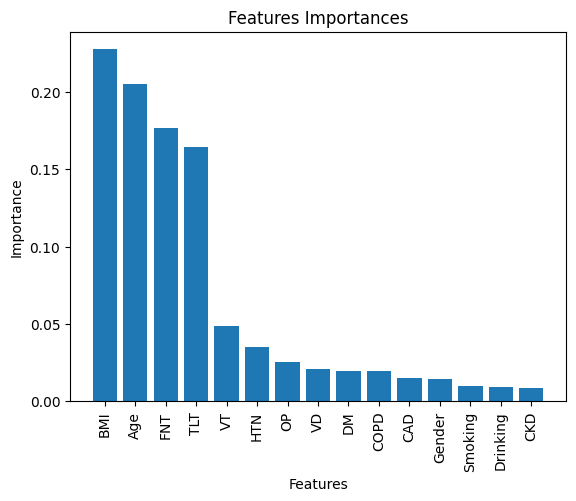

In [60]:
import matplotlib.pyplot as plt

plt.bar(range(X.shape[1]), importances[indices])

plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)

plt.title("Features Importances")
plt.xlabel("Features")
plt.ylabel("Importance")

plt.show()

## MinMaxScaler
The values of a few columns (Age, BMI, FNT, TLT, VT, and HTN) in the input data frame (df) are normalized to a
range of 0–1 using the MinMaxScaler object from sklearn.preprocessing

In [61]:
from sklearn.preprocessing import MinMaxScaler
Model_df = df[['Age','BMI', 'FNT', 'TLT','VT','HTN','Fracture']]
# create a scaler object
scaler = MinMaxScaler()

# Fiting age column from 0-1
Model_df['Age'] = scaler.fit_transform(Model_df['Age'].values.reshape(-1, 1))
Model_df['BMI'] = scaler.fit_transform(Model_df['BMI'].values.reshape(-1, 1))
Model_df['FNT'] = scaler.fit_transform(Model_df['FNT'].values.reshape(-1, 1))
Model_df['TLT'] = scaler.fit_transform(Model_df['TLT'].values.reshape(-1, 1))
Model_df['VT'] = scaler.fit_transform(Model_df['VT'].values.reshape(-1, 1))
Model_df['HTN'] = scaler.fit_transform(Model_df['HTN'].values.reshape(-1, 1))


# Resulting dataframe
print(Model_df)

           Age       BMI       FNT       TLT   VT  HTN  Fracture
0     0.467697  0.294545  0.270968  0.240506  0.0  1.0         0
1     0.370787  0.405119  0.483871  0.588608  0.0  1.0         0
2     0.216292  0.423574  0.154839  0.158228  0.0  1.0         0
3     0.507022  0.514142  0.374194  0.430380  0.0  1.0         0
4     0.841292  0.438552  0.406452  0.462025  0.0  1.0         0
...        ...       ...       ...       ...  ...  ...       ...
1532  0.314607  0.493208  0.354839  0.436709  0.0  0.0         0
1533  0.314607  0.502471  0.645161  0.778481  0.0  1.0         0
1534  0.252809  0.543137  0.529032  0.594937  0.0  0.0         0
1535  0.370787  0.486444  0.761290  0.784810  0.0  0.0         0
1536  0.230337  0.719993  0.464516  0.443038  0.0  1.0         0

[1537 rows x 7 columns]


<ipython-input-61-4752857765ef>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Model_df['Age'] = scaler.fit_transform(Model_df['Age'].values.reshape(-1, 1))
<ipython-input-61-4752857765ef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Model_df['BMI'] = scaler.fit_transform(Model_df['BMI'].values.reshape(-1, 1))
<ipython-input-61-4752857765ef>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

## define the dependent and independent variables

In [62]:

#Defining dependent and independent varaibles
y = Model_df['Fracture']
x = Model_df.filter(['Age','BMI', 'FNT', 'TLT','HTN', 'VT'])

 #Training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=20)

### to balance the samples in test and training data respectively

In [63]:
from imblearn.over_sampling import SMOTE

x_train_resampled, y_train_resampled = SMOTE().fit_resample(x_train, y_train)
x_train, x_test, y_train, y_test = train_test_split(x_train_resampled, y_train_resampled, test_size=0.20, random_state=30)

### to confirm the balanced sampling

In [64]:
print(y_train_resampled.shape)
y_train_resampled.value_counts()

(2406,)


Fracture
0    1203
1    1203
Name: count, dtype: int64

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_train_resampled, y_train_resampled, test_size=0.20, random_state=30)

## Logistic Regression
The logistic regression model is instantiated with LogisticRegression(), followed by conducting 5-fold cross-validation using cross_val_score(). Subsequently, the accuracy of the logistic regression model is computed via accuracy_score(). The model achieves an overall accuracy of 67.01%, with precision and recall values ranging between 63-72% for one class and 57-78% for the other. The f1-score, representing the harmonic mean of precision and recall, is approximately 0.74 and 0.64 for classes 0 and 1, respectively.



In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


# logistic regression model
logisticRegr = LogisticRegression()

# 5-fold cross-validation
cv_scores = cross_val_score(logisticRegr, x_train, y_train, cv=5)

# cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Fit the logistic regression model on the training data
logisticRegr.fit(x_train, y_train)

# Predict on the test data
lg_pred = logisticRegr.predict(x_test)
from sklearn.metrics import accuracy_score
lg_accuracy = accuracy_score(y_test, lg_pred) * 100
print('Accuracy: ', lg_accuracy)


from sklearn.metrics import classification_report
print(classification_report(y_test, lg_pred))

Cross-validation scores: [0.68311688 0.63376623 0.68311688 0.63636364 0.640625  ]
Mean cross-validation score: 0.6553977272727273
Accuracy:  68.25726141078839
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       229
           1       0.75      0.60      0.67       253

    accuracy                           0.68       482
   macro avg       0.69      0.69      0.68       482
weighted avg       0.69      0.68      0.68       482



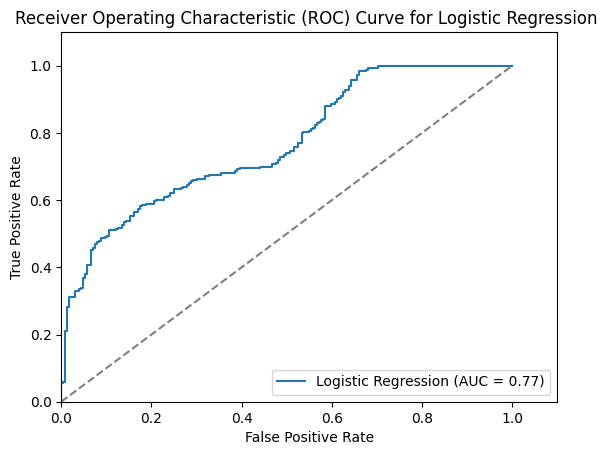

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

lg_probs = logisticRegr.predict_proba(x_test)[:, 1]

fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_test, lg_probs)

auc_score = roc_auc_score(y_test, lg_probs)

plt.plot(fpr_lg, tpr_lg, label='Logistic Regression (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression ')
plt.legend(loc='lower right')
plt.show()

 RandomForestClassifier

In [69]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)

rfc_scores = cross_val_score(rfc, x_train, y_train, cv=6)
print("Random Forest Classification Model")
print("CV scores: ", rfc_scores)
print("Mean CV accuracy: {:.2f}".format(rfc_scores.mean()))
print(" ")

rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)

from sklearn.metrics import accuracy_score
rfc_accuracy = accuracy_score(y_test, rfc_pred) * 100
print('Accuracy: ', rfc_accuracy)

#Bar plot of the model performance
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))
print("")

Random Forest Classification Model
CV scores:  [0.96573209 0.93457944 0.9470405  0.91900312 0.9125     0.95625   ]
Mean CV accuracy: 0.94
 
Accuracy:  93.98340248962656
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       229
           1       0.94      0.94      0.94       253

    accuracy                           0.94       482
   macro avg       0.94      0.94      0.94       482
weighted avg       0.94      0.94      0.94       482




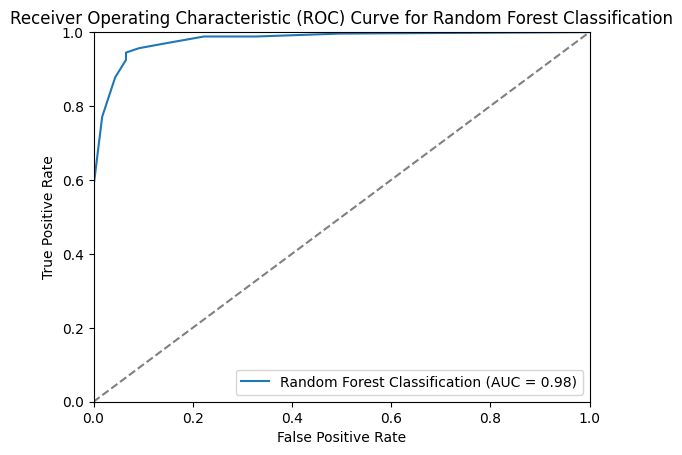

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilities for positive class
rfc_probs = rfc.predict_proba(x_test)[:, 1]

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, rfc_probs)

# AUC score
auc_rfc = roc_auc_score(y_test, rfc_probs)

# Plot ROC curve
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest Classification (AUC = {:.2f})'.format(auc_rfc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classification')
plt.legend()
plt.show()

## Decision Tree:

In [71]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

#fit the model
dtc = DecisionTreeClassifier()

dtc_scores = cross_val_score(dtc, x_train, y_train, cv=5)
print("DTC Classification Model")
print("CV scores: ", dtc_scores)
print("Mean CV accuracy: {:.2f}".format(dtc_scores.mean()))
print(" ")

dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_test)

#Model performance
print("Decision Tree Classification Model")
#print('Mean squared error: %.2f' % mean_squared_error(y_test, dtc_pred))
#print('Coefficient of determination: %.2f' % r2_score(y_test, dtc_pred))

from sklearn.metrics import accuracy_score
dtc_accuracy = accuracy_score(y_test, dtc_pred) * 100
print('Accuracy: ', dtc_accuracy)

#Bar plot of the model performance
from sklearn.metrics import classification_report
print(classification_report(y_test, dtc_pred))
print("")

DTC Classification Model
CV scores:  [0.90909091 0.89090909 0.90909091 0.89350649 0.89322917]
Mean CV accuracy: 0.90
 
Decision Tree Classification Model
Accuracy:  91.07883817427386
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       229
           1       0.89      0.94      0.92       253

    accuracy                           0.91       482
   macro avg       0.91      0.91      0.91       482
weighted avg       0.91      0.91      0.91       482




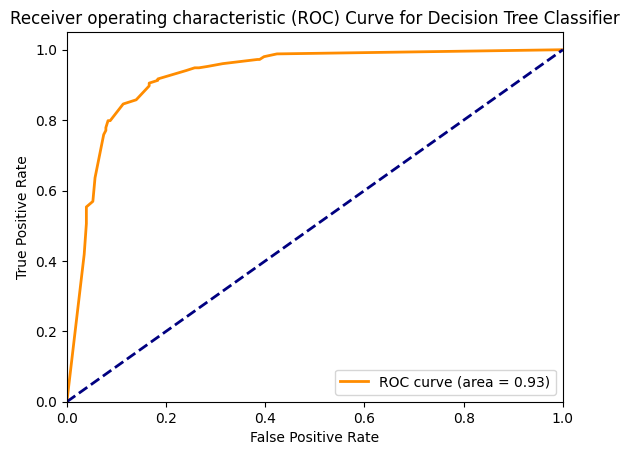

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


dtc = DecisionTreeClassifier(max_depth=10, min_samples_split=20, min_samples_leaf=10)


dtc.fit(x_train, y_train)

dtc_probs = dtc.predict_proba(x_test)[:, 1]


fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, dtc_probs)


auc_dtc = roc_auc_score(y_test, dtc_probs)


plt.plot(fpr_dtc, tpr_dtc, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_dtc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

## Gaussian Naïve Bayes:

In [83]:
#Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB


GNB = GaussianNB()
GNB.fit(x_train, y_train)


GNB_scores = cross_val_score(GNB, x_train, y_train, cv=6)
print("GradientBoostingClassifier Model")
print("CV scores: ", GNB_scores)
print("Mean CV accuracy: {:.2f}".format(GNB_scores.mean()))
print(" ")


GradientBoostingClassifier Model
CV scores:  [0.59501558 0.61682243 0.60124611 0.57009346 0.578125   0.5875    ]
Mean CV accuracy: 0.59
 


## Gaussian Naïve Bayers Classifier model

In [74]:
GNB.fit(x_train, y_train)
GNB_pred = GNB.predict(x_test)

#Model performance
print("Gaussian Naive Bayes classifier Model")
from sklearn.metrics import accuracy_score
GNB_accuracy = accuracy_score(y_test, GNB_pred) * 100
print('Accuracy: ', GNB_accuracy)

#Bar plot of the model performance
from sklearn.metrics import classification_report
print(classification_report(y_test, GNB_pred))
print("")

Gaussian Naive Bayes classifier Model
Accuracy:  58.713692946058096
              precision    recall  f1-score   support

           0       0.54      0.97      0.69       229
           1       0.91      0.24      0.38       253

    accuracy                           0.59       482
   macro avg       0.72      0.61      0.53       482
weighted avg       0.73      0.59      0.53       482




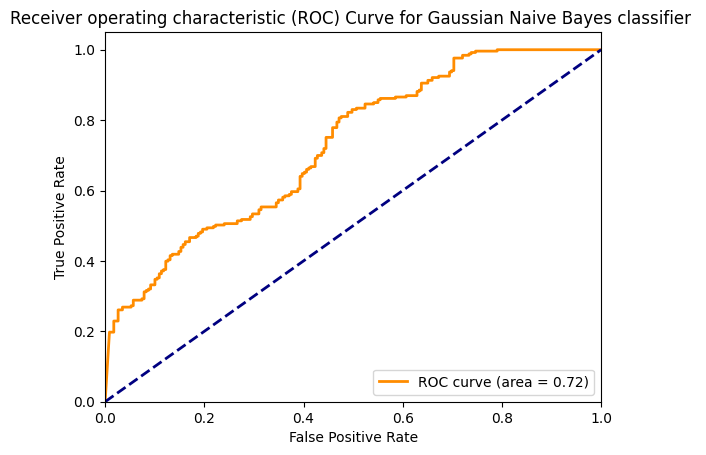

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for positive class
GNB_probs = GNB.predict_proba(x_test)[:, 1]

# Compute false positive rate (FPR), true positive rate (TPR), and thresholds
fpr_GNB, tpr_GNB, thresholds_GNB = roc_curve(y_test, GNB_probs)

# Compute Area Under the ROC Curve (AUC)
auc_GNB = roc_auc_score(y_test, GNB_probs)

# Plot ROC curve
plt.plot(fpr_GNB, tpr_GNB, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_GNB)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Gaussian Naive Bayes classifier ')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Confusion matrix - Logistic Regression')

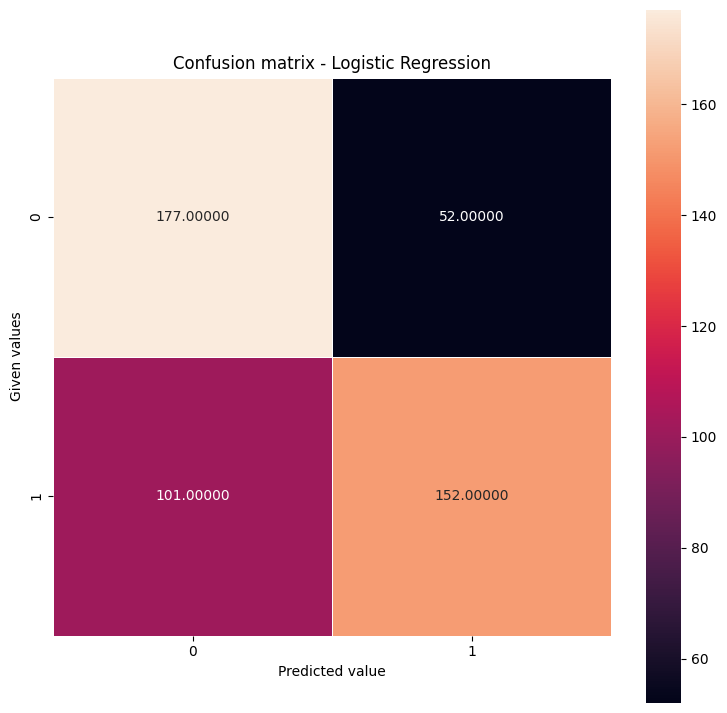

In [84]:
#Constructing confusion matrix
plt.figure(figsize=(9,9))
conf_mat = metrics.confusion_matrix(y_test, lg_pred)
sns.heatmap(conf_mat, annot=True, fmt=".5f", linewidths=.7, square=True);
plt.xlabel('Predicted value');
plt.ylabel('Given values');
plt.title('Confusion matrix - Logistic Regression')

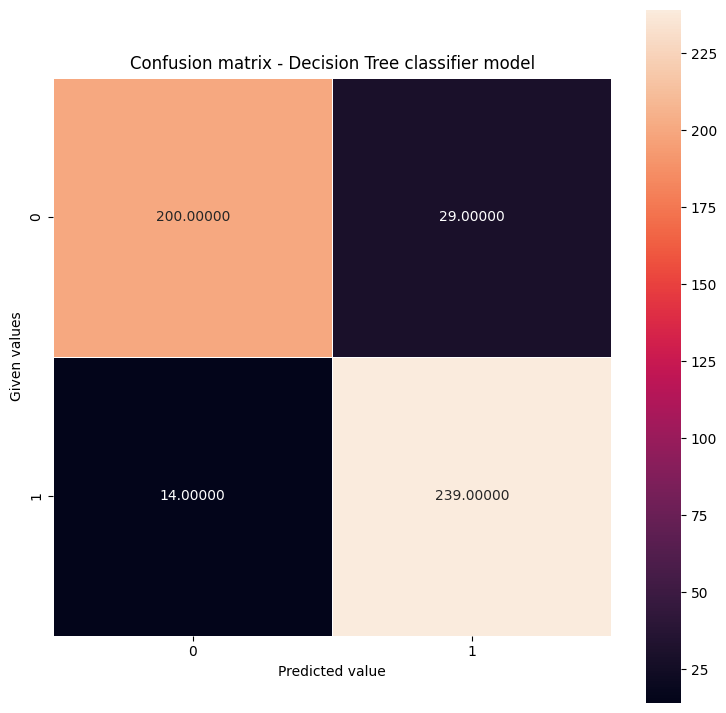

In [77]:
#Constructing confusion matrix
plt.figure(figsize=(9,9))
conf_mat = metrics.confusion_matrix(y_test, dtc_pred)
sns.heatmap(conf_mat, annot=True, fmt=".5f", linewidths=.7, square=True);
plt.xlabel('Predicted value');
plt.ylabel('Given values');
plt.title('Confusion matrix - Decision Tree classifier model');

Text(0.5, 1.0, 'Confusion matrix - Naive Bayes classifier')

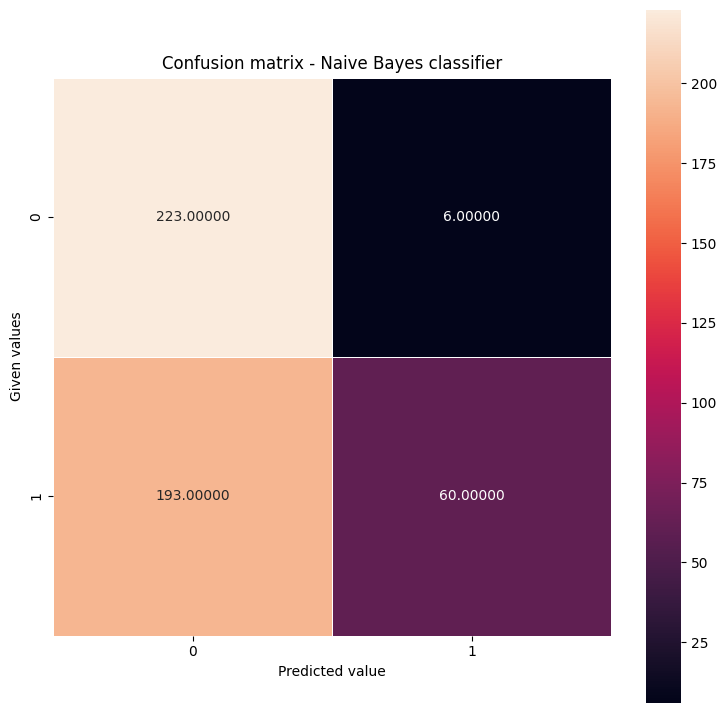

In [78]:
#Constructing confusion matrix
plt.figure(figsize=(9,9))
conf_mat = metrics.confusion_matrix(y_test, GNB_pred)
sns.heatmap(conf_mat, annot=True, fmt=".5f", linewidths=.7, square=True);
plt.xlabel('Predicted value');
plt.ylabel('Given values');
plt.title('Confusion matrix - Naive Bayes classifier')

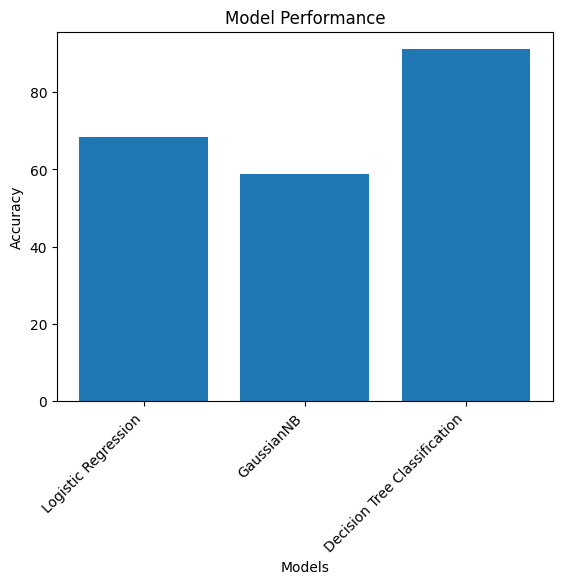

In [85]:
#Bar plot of to compare the model performance
models = ['Logistic Regression', 'GaussianNB','Decision Tree Classification']
accuracy = [lg_accuracy, GNB_accuracy,dtc_accuracy]
plt.bar(models, accuracy)
plt.title('Model Performance')
plt.xlabel('Models')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.show()

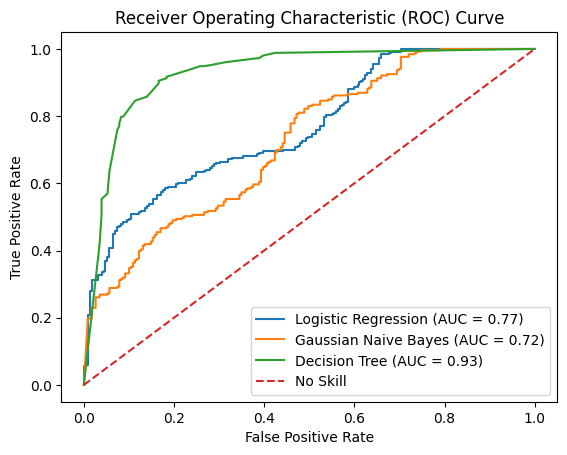

In [86]:
# Probabilities for positive class
lg_probs = logisticRegr.predict_proba(x_test)[:, 1]

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_test, lg_probs)

# Predicted probabilities for test data
GNB_probs = GNB.predict_proba(x_test)[:, 1]

# False positive rate and true positive rate
fpr_GNB, tpr_GNB, thresholds_svm = roc_curve(y_test, GNB_probs)

# Area under the curve
auc_GNB= roc_auc_score(y_test, GNB_probs)

# Predict probabilities for positive class
dtc_probs = dtc.predict_proba(x_test)[:, 1]

# Compute false positive rate (FPR), true positive rate (TPR), and thresholds
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, dtc_probs)

# Compute Area Under the ROC Curve (AUC)
auc_dtc = roc_auc_score(y_test, dtc_probs)

# Plot ROC curve for all models
plt.plot(fpr_lg, tpr_lg, label=f'Logistic Regression (AUC = {auc_score:.2f})')
#plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (AUC = {auc_rfc:.2f})')
plt.plot(fpr_GNB, tpr_GNB, label=f'Gaussian Naive Bayes (AUC = {auc_GNB:.2f})')
plt.plot(fpr_dtc, tpr_dtc, label=f'Decision Tree (AUC = {auc_dtc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [87]:
lg_accuracy = accuracy_score(y_test, lg_pred) * 100
print('The accuracy of the logistic regression model is: ', lg_accuracy)
dtc_accuracy = accuracy_score(y_test, dtc_pred) * 100
print('The accuracy of the Decision tree model is: ', dtc_accuracy)
GNB_accuracy = accuracy_score(y_test, GNB_pred) * 100
print('The accuracy of the Gaussian Naive Bayes Classifier model is: ', GNB_accuracy)

The accuracy of the logistic regression model is:  68.25726141078839
The accuracy of the Decision tree model is:  91.07883817427386
The accuracy of the Gaussian Naive Bayes Classifier model is:  58.713692946058096


In [88]:

# Get the classification report for the logistic regression model
lg_report = classification_report(y_test, lg_pred, output_dict=True)
df_lg = pd.DataFrame(lg_report).transpose()

# Get the classification report for the decision tree model
dtc_report = classification_report(y_test, dtc_pred, output_dict=True)
df_dtc = pd.DataFrame(dtc_report).transpose()

# Get the classification report for the Gaussian Naive Bayes model
GNB_report = classification_report(y_test, GNB_pred, output_dict=True)
df_GNB = pd.DataFrame(GNB_report).transpose()

# Concatenate the DataFrames
result_df = pd.concat([df_lg, df_dtc, df_GNB], axis=0, keys=['Logistic Regression', 'Decision Tree',
                                                             'Gaussian Naive Bayes'])

# Format the DataFrame
result_df.columns = ['precision', 'recall', 'f1-score', 'support']
result_df.index.names = ['model', 'class']

# Display the DataFrame
print(result_df)


                                   precision    recall  f1-score     support
model                class                                                  
Logistic Regression  0              0.636691  0.772926  0.698225  229.000000
                     1              0.745098  0.600791  0.665208  253.000000
                     accuracy       0.682573  0.682573  0.682573    0.682573
                     macro avg      0.690894  0.686858  0.681716  482.000000
                     weighted avg   0.693593  0.682573  0.680894  482.000000
Decision Tree        0              0.934579  0.873362  0.902935  229.000000
                     1              0.891791  0.944664  0.917466  253.000000
                     accuracy       0.910788  0.910788  0.910788    0.910788
                     macro avg      0.913185  0.909013  0.910200  482.000000
                     weighted avg   0.912120  0.910788  0.910562  482.000000
Gaussian Naive Bayes 0              0.536058  0.973799  0.691473  229.000000